In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sn
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_csv("additional_co2_new.csv",sep=";")
def round_5(x, base=5):
    return base * round(x/base)
# df['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

In [3]:
df = df.dropna(how='any',axis=1)
df.head

<bound method NDFrame.head of      Unnamed: 0        country  year  cement_co2_per_capita  \
0             0         Africa  1990                  0.036   
1             1         Africa  1991                  0.038   
2             2         Africa  1992                  0.038   
3             3         Africa  1993                  0.036   
4             4         Africa  1994                  0.036   
..          ...            ...   ...                    ...   
107         107  North America  2013                  0.121   
108         108  North America  2014                  0.127   
109         109  North America  2015                  0.129   
110         110  North America  2016                  0.124   
111         111  North America  2017                  0.127   

     coal_co2_per_capita  flaring_co2_per_capita  gas_co2_per_capita  \
0                  0.472                   0.033               0.121   
1                  0.475                   0.032               0.122 

In [4]:
# select relevant entries


df_rf = df[['cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'consumption_co2_per_capita', 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)']]

In [5]:

t_f = df_rf.columns[:-1]


t = df_rf.columns[-1]

In [6]:
# Split Dataset

X_train, X_test, y_train, y_test = train_test_split(df_rf[t_f], df_rf[t], test_size=0.25,  shuffle=True)

In [9]:

# Classifier
clr = RandomForestClassifier(n_estimators=100,max_depth=1,random_state=0) # diese Zahlen verändern erste zwei
clr.fit(X_train, y_train)

# prediction
y_pred_df = clr.predict(X_test)
print("Acuracy:",accuracy_score(y_test,y_pred_df))



Acuracy: 0.39285714285714285


In [11]:
# feature imortance

fi = pd.DataFrame(clr.feature_importances_,
                  index=df_rf.columns.values[:-1],
                  columns=['importance'])
fi_sorted = fi.sort_values('importance', ascending=False)
fi_sorted

,importance
coal_co2_per_capita,0.27
oil_co2_per_capita,0.21
gas_co2_per_capita,0.16
cement_co2_per_capita,0.15
consumption_co2_per_capita,0.13
flaring_co2_per_capita,0.07
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",0.01


In [12]:
print("Accuracy:",accuracy_score(y_test, y_pred_df)) 

Accuracy: 0.39285714285714285


In [13]:
predicted_surv_rf = clr.predict(X_test)
cm=confusion_matrix(y_test,predicted_surv_rf)



NameError: name 'plt' is not defined

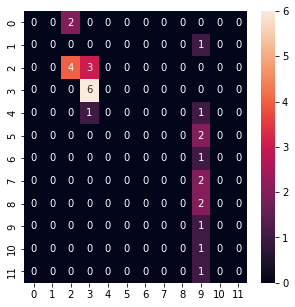

In [21]:
rcParams['figure.figsize'] = 5,5
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")